<a href="https://colab.research.google.com/github/IsWallison/Projeto_Churn_Prediction/blob/main/Projeto_Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# Importar os modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# importar os pacotes necessários
import pandas as pd

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Instruções para o modelo de churn prediction

ENTENDA O SEU PROBLEMA
* Olhar o todo e delimitar o escopo do projeto
* Como a solução vai ser usada?
* Quais são as soluções já existentes?
* Qual abordagem usar?
    * Aprendizado Supervisionado
    * Aprendizado Não Supervisionado
    * Aprendizado Por Reforço
* Qual é a métrica de performance?
* Qual a performance mínima esperada para atingir o objetivo?
* Liste as premissas básicas do projeto
* Pesquise sobre *churn rate* no Google
* Veja os serviços que outras empresas de Telecom oferecem 

EXPLORAR OS DADOS
* Estudar cada atributo e suas características:
    * Nome
    * Tipo
        * Categórica
        * Numérica
            * int
            * float
        * Estruturada
        * Não Estruturada
        * etc
    * % de valores ausentes
    * Ruído nos dados e tipo de ruído (outliers, estocásticos, erros de arredondamento)
    * Tipo de distribuição
        * Gaussiana
        * Uniforme
        * Logarítmica
        * etc
* Identificar a variável alvo (target)
* Visualizar os dados
* Estudar a correlação entre os dados
* Ver o balanceamento das classes
* Identificar as transformações que podem ser aplicadas
* Identificar os dados extras que podem ser úteis


PREPARAÇÃO DOS DADOS
* Limpeza dos Dados
    * Consertar ou remover outliers
    * Preencher os valores faltantes ou eliminar as linhas/colunas
        * Zero
        * Média
        * Mediana
        * Frequência
* Seleção de atributos
    * Eliminar os atributos (*features*) que não contêm informações úteis

* *Feature Engineering*
    * Discretizar variáveis contínuas
    * Decompor *features* (categóricas, data, tempo)
    * Aplicar transformações às variáveis
    * Agregar *features* para gerar novas
    
* *Feature Scaling*
    * Normalizar ou padronizar *features*

* Dividir entre treino, teste e validação

CONSTRUIR MODELO(S) DE MACHINE LEARNING
* Analisar as variáveis mais significativas para cada algoritmo
* *Hyperparameters Tuning* (se necessário)
* Uso de *cross-validation*
* Verificar o desempenho do(s) modelo(s) e considerar métodos *Ensemble*

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


In [ ]:
df_clean = df.copy()
df_clean = df.drop(df[df['TotalCharges']==' '].index,axis=0)
df_clean = df_clean.drop('customerID', axis=1)
df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(float)

In [ ]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_clean['Churn'] = (df_clean['Churn']== 'Yes').astype(int)
df_clean = pd.get_dummies(df_clean)
df_clean.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


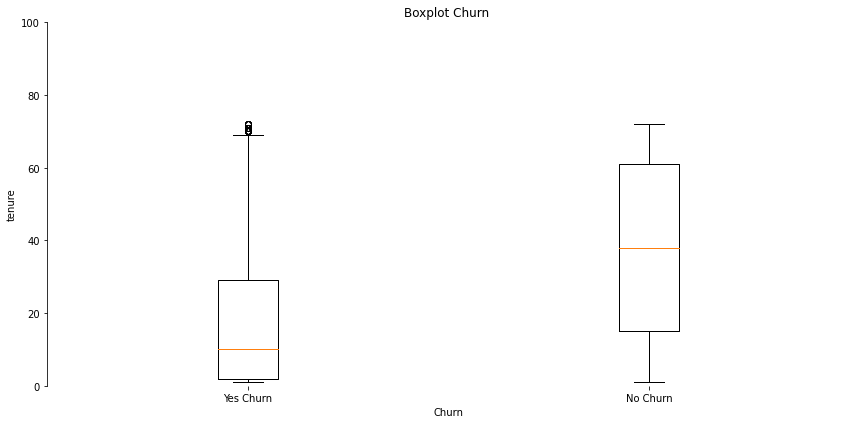

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(df_clean['tenure'][df_clean['Churn'] == 1], positions=[1])

# Plot the second box plot using the second dataset
ax.boxplot(df_clean['tenure'][df_clean['Churn'] == 0], positions=[2])

plt.subplots_adjust(wspace=100, hspace=-50)

ax.set_title("Boxplot Churn ")
ax.set_xlabel("Churn")
ax.set_ylabel("tenure")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])   # remove y-tick labels for the first subplot
plt.xticks([2, 1], ['No Churn', 'Yes Churn'])
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

In [ ]:
# separar variáveis entre X e y com as colunas escolhidas y vai ser ser o alvo 
def transform(oversample=False, scale=False, undersample=False):
  X = df_clean.drop('Churn', axis=1)
  y = df_clean['Churn']

  if oversample:
    oversampler = RandomOverSampler(random_state=42)
    X, y = oversampler.fit_resample(X, y)

  if scale:
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

  if undersample:
    undersampler = RandomUnderSampler(random_state=42)
    X, y = undersampler.fit_resample(X, y)

  # dividir o dataset entre treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y, shuffle=True)

  print('X Train : ', X_train.shape )
  print('Test : ', X_test.shape)
  print('Y Train : ', y_train.shape)
  print('y Test : ',y_test.shape)
  print('Churn 1:', sum(y==1))
  print('Churn 0: ', sum(y==0))
  return X_train, X_test, y_train, y_test

In [ ]:
X_train_over, X_test_over, y_train_over, y_test_over = transform(oversample=True)
X_train, X_test, y_train, y_test = transform(undersample=False)
X_train, X_test, y_train, y_test = transform()

X Train :  (5274, 45)
Test :  (1758, 45)
Y Train :  (5274,)
y Test :  (1758,)
Churn 1: 1869
Churn 0:  5163


In [ ]:
acc1 = 0
for i in range(1,100):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    knn_accuracy = knn_model.score(X_test, y_test) 
    if knn_accuracy > acc1:
        acc1 = knn_accuracy
        n_nei = i
print('n_neighbors:', n_nei)


n_neighbors: 1


In [ ]:
#Criar o modelo k-nearest neighbors e treinar com dados de treino
knn_model = KNeighborsClassifier(n_neighbors =1)
knn_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_knn = knn_model.predict(X)

#Avaliação do modelo knn com os dados de teste comparados com os dados reais
knn_mae = mean_absolute_error(y, y_pred_knn)
knn_mse = mean_squared_error(y, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_accuracy = knn_model.score(X, y)
knn_confusion_matrix = confusion_matrix(y, y_pred_knn)

print("Accuracy: ", knn_accuracy)
print("MAE:", knn_mae)
print("RMSE:", knn_rmse)
print(classification_report(y, y_pred_knn))
print("Confusion Matrix:", knn_confusion_matrix)

ValueError: ignored

In [ ]:
#Criar o modelo de Logistic Regretion e treinar com dados de treino
regre_model = LogisticRegression(random_state=1)
regre_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_regre = regre_model.predict(X_test)

#Avaliação do modelo Logistic Regretion com os dados de teste comparados com os dados reais
regre_mae = mean_absolute_error(y_test, y_pred_regre)
regre_mse = mean_squared_error(y_test, y_pred_regre)
regre_rmse = np.sqrt(regre_mse)
regre_accuracy = accuracy_score(y_test, y_pred_regre)
regre_confusion_matrix = confusion_matrix(y_test, y_pred_regre)
print("MAE:", regre_mae)
print("RMSE:", regre_rmse)
print("Accuracy:", accuracy_score(y_test, y_pred_regre))
print(classification_report(y_test, y_pred_regre))
print("Confusion Matrix:", regre_confusion_matrix)

MAE: 0.19738339021615472
RMSE: 0.4442785052375984
Accuracy: 0.8026166097838453
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.57      0.60       467

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758

Confusion Matrix: [[1147  144]
 [ 203  264]]


In [ ]:
#Criar o modelo de Decision Tree e treinar com dados de treino
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_tree = knn_model.predict(X_test)

#Avaliação do modelo Decision Tree com os dados de teste comparados com os dados reais
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_confusion_matrix = confusion_matrix(y_test, y_pred_tree)

print("MAE:", tree_mae)
print("RMSE:", tree_rmse)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:", tree_confusion_matrix)

MAE: 0.3031854379977247
RMSE: 0.5506227728651665
Accuracy: 0.6968145620022753
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1291
           1       0.43      0.47      0.45       467

    accuracy                           0.70      1758
   macro avg       0.62      0.62      0.62      1758
weighted avg       0.70      0.70      0.70      1758

Confusion Matrix: [[1007  284]
 [ 249  218]]
